In [69]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;





In [2]:
df= pd.read_csv('test.csv')
df1= pd.read_csv('train.csv')

In [3]:
df.shape

(5681, 11)

In [4]:
df1.shape


(8523, 12)

In [5]:
print(df.shape)
print(df1.shape)

print(df.info())
print(df1.info())

print(df.isna().sum())
print(df1.isna().sum())

(5681, 11)
(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522


In [6]:

print(df.describe())
print(df1.describe())


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   


In [7]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
df1.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']].astype(float)


In [10]:
df1[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']].astype(float)

In [11]:

print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [12]:

print(df1.isnull().sum())


Item_Identifier                 0
Item_Weight                  3818
Item_Fat_Content                0
Item_Visibility              2842
Item_Type                       0
Item_MRP                     2842
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
categorical_cols = list(df.select_dtypes(include=['object', 'category']).columns)
print('Categorical columns:', categorical_cols)


numeric_cols = list(df.select_dtypes(include=['int', 'float']).columns)
print('Numeric columns:', numeric_cols)

Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numeric columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [14]:
categorical_cols = list(df1.select_dtypes(include=['object', 'category']).columns)
print('Categorical columns:', categorical_cols)

# Identify numeric columns
numeric_cols = list(df1.select_dtypes(include=['int', 'float']).columns)
print('Numeric columns:', numeric_cols)

Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numeric columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].median())

categorical_cols = df1.select_dtypes(exclude=np.number).columns.tolist()
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

In [16]:
print(df.isnull(),df1.isnull().sum())

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
5676            False        False             False            False   
5677            False        False             False            False   
5678            False        False             False            False   
5679            False        False             False            False   
5680            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False    

In [17]:
duplicates_df = df[df.duplicated()]
print(duplicates_df)


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


In [18]:
duplicates_df1 = df1[df1.duplicated()]
print(duplicates_df1)


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


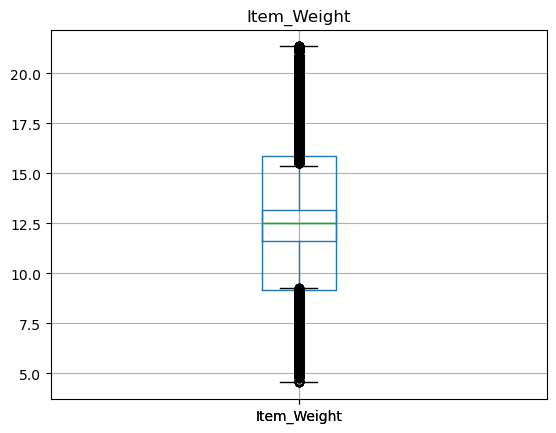

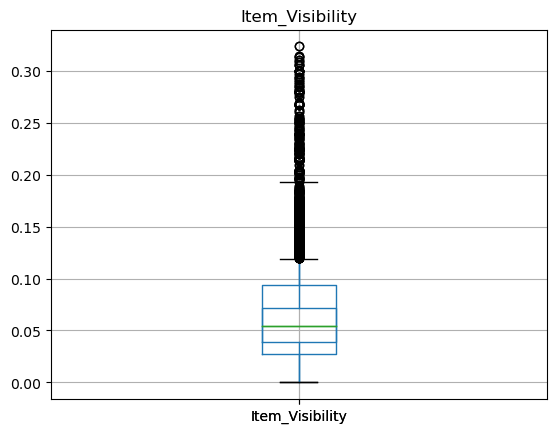

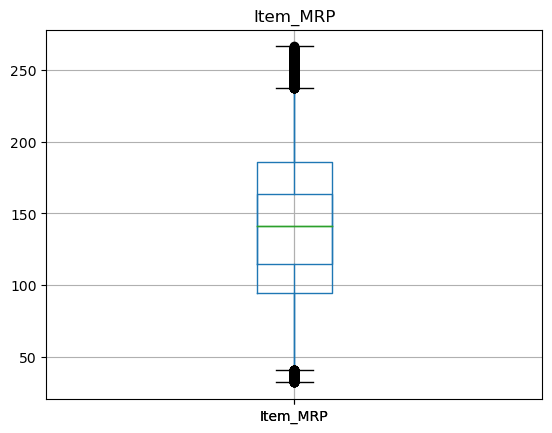

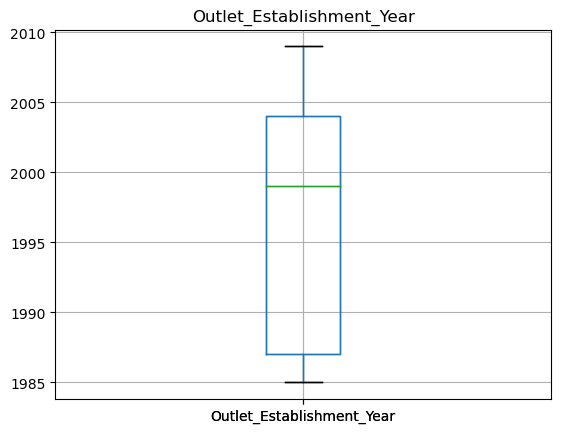

KeyError: "None of [Index(['Item_Outlet_Sales'], dtype='object')] are in the [columns]"

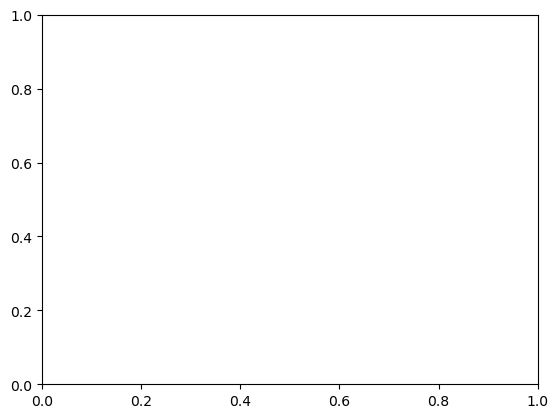

In [19]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Create boxplots for each numeric column
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    df1.boxplot(column=col)
    plt.title(col)
    plt.show()


In [20]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.018342,0.045048,0.025678
Item_Visibility,-0.018342,1.000000,-0.014013,-0.097040
Item_MRP,0.045048,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.025678,-0.097040,-0.007233,1.000000


In [21]:
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015346,0.044956,-0.023421,-0.002168
Item_Visibility,-0.015346,1.000000,-0.014368,0.013233,0.017658
Item_MRP,0.044956,-0.014368,1.000000,0.003595,-0.005438
Outlet_Establishment_Year,-0.023421,0.013233,0.003595,1.000000,-0.049135
Item_Outlet_Sales,-0.002168,0.017658,-0.005438,-0.049135,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()


df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])


In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,1.905090,Low Fat,-1.134077,Snack Foods,-0.536555,OUT049,0.139891,Medium,Tier 1,Supermarket Type1
1,FDW14,-1.027457,reg,-0.531850,Dairy,-0.868937,OUT017,1.095512,Medium,Tier 2,Supermarket Type1
2,NCN55,0.456482,Low Fat,0.661316,Others,1.629848,OUT010,0.020438,Medium,Tier 3,Grocery Store
3,FDQ58,-1.259469,Low Fat,-0.981416,Snack Foods,0.226697,OUT017,1.095512,Medium,Tier 2,Supermarket Type1
4,FDY38,-0.038164,Regular,1.032540,Dairy,1.508110,OUT027,-1.532446,Medium,Tier 3,Supermarket Type3


In [25]:
df1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,2.348471,Low Fat,-1.286380,Dairy,-0.659788,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.242594,Regular,-0.554888,Soft Drinks,-1.066904,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,0.574571,Low Fat,0.894386,Meat,1.993718,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,-1.526707,Regular,-1.100951,Fruits and Vegetables,0.275078,OUT010,0.020085,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.031150,Low Fat,1.345291,Household,1.844609,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373


In [26]:
# select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# create dummy variables for each categorical column
for col in cat_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    
# drop the original categorical columns
df.drop(cat_cols, axis=1, inplace=True)


In [27]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.905090,-1.134077,-0.536555,0.139891,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.027457,-0.531850,-0.868937,1.095512,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0.456482,0.661316,1.629848,0.020438,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-1.259469,-0.981416,0.226697,1.095512,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,-0.038164,1.032540,1.508110,-1.532446,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [28]:
df1 = pd.get_dummies(df1)


In [29]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,2.348471,-1.286380,-0.659788,0.139541,0.910601,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.242594,-0.554888,-1.066904,1.334103,-1.018440,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.574571,0.894386,1.993718,0.139541,-0.049238,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,-1.526707,-1.100951,0.275078,0.020085,-0.849103,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,-0.031150,1.345291,1.844609,-1.293934,-0.695373,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index([], dtype='object')


In [31]:
cat_cols = df1.select_dtypes(include=['object']).columns
print(cat_cols)


Index([], dtype='object')


In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,-5.342985e-17,-4.633584e-17,1.373855e-17,1.244677e-16,0.000528,0.000352,0.000880,0.000704,0.000704,0.000704,...,0.108960,0.109136,0.109136,0.610456,0.280232,0.326703,0.393065,0.654286,0.108784,0.109840
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,0.022976,0.018761,0.029656,0.026528,0.026528,0.026528,...,0.311616,0.311837,0.311837,0.487690,0.449152,0.469049,0.488474,0.475642,0.311395,0.312718
min,-1.909576e+00,-1.281690e+00,-1.764188e+00,-1.532446e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.166432e-01,-7.539239e-01,-7.541832e-01,-1.293541e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.816395e-02,-2.249774e-01,6.344716e-03,1.398906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.509148e-01,5.420473e-01,7.281662e-01,7.371538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2.046417e+00,5.033447e+00,2.031678e+00,1.334417e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


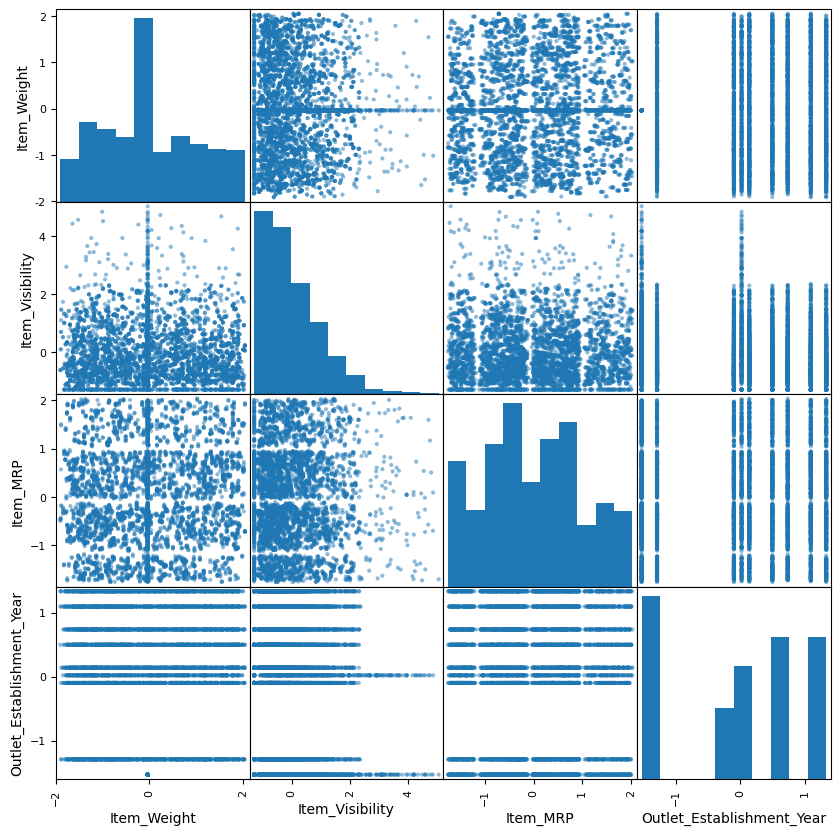

In [45]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# create a scatter matrix
pd.plotting.scatter_matrix(df[num_cols], figsize=(10,10))
plt.show()


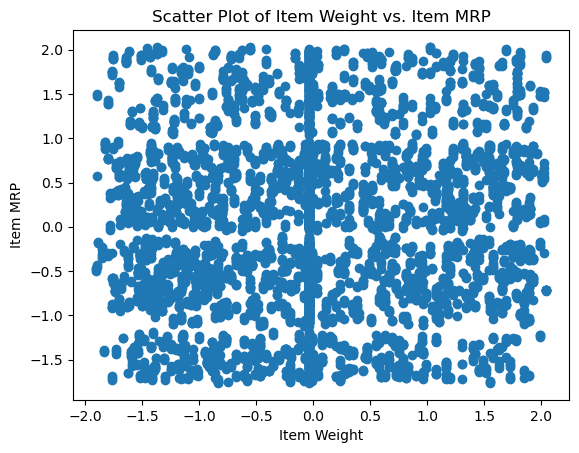

In [46]:
import matplotlib.pyplot as plt

plt.scatter(df['Item_Weight'], df['Item_MRP'])

# Add labels and title
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')
plt.title('Scatter Plot of Item Weight vs. Item MRP')

plt.show()


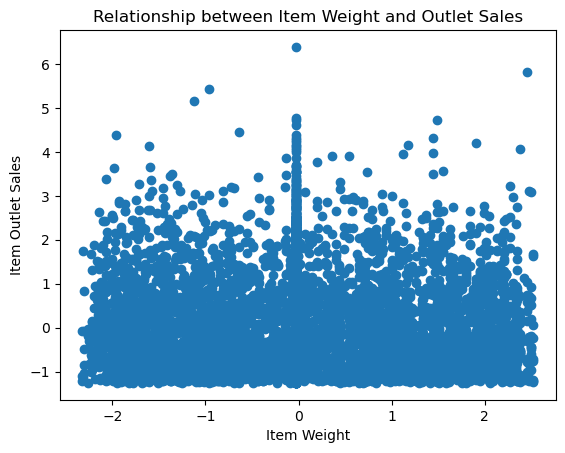

In [48]:
plt.scatter(df1['Item_Weight'], df1['Item_Outlet_Sales'])

# Add axis labels and a title
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Weight and Outlet Sales')

# Display the plot
plt.show()

In [50]:
df.isna().sum()


Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Identifier_DRA24            0
                                ..
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Length: 1581, dtype: int64

In [51]:
df.isna().sum()


Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
                                ..
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Length: 1605, dtype: int64

In [57]:
print(df.columns)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25',
       ...
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1581)


In [58]:
print(df1.columns)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1605)


In [62]:
from sklearn import preprocessing
  
.
label_encoder = preprocessing.LabelEncoder()
  

df['Item_Weight']= label_encoder.fit_transform(df['Item_Weight'])
  
df['Item_Weight'].unique()

array([403, 223, 337, 156, 316, 286, 389,  79,  60, 361, 100,   5, 363,
        68, 394, 374, 327, 142, 387, 328, 118, 321,  49, 329, 319, 283,
        46, 292, 379, 406, 393, 234, 349, 111, 290, 308, 320, 313, 378,
        59, 318, 322, 402, 197, 325, 368, 225, 409,  52, 164, 338, 331,
       377, 371, 187, 193, 359, 356,  24,  34, 101,  84, 247, 373,  90,
       317, 203, 380,  62, 309,  76, 360, 352, 104, 214,  72, 215, 228,
       127, 399, 388,  31,  27, 312, 300,  45,  28,  67, 217, 333, 334,
        38,  42, 145, 346, 347, 249, 273, 391, 288, 303,  98, 323,   4,
       294, 279, 135, 194, 386, 170, 254, 369, 345,  29, 326, 222, 297,
       350,   8, 278, 264, 383, 257, 125, 358, 330, 375, 276, 404, 398,
       293, 351, 307, 400,  12, 245, 370, 296, 341, 407, 269,  13, 302,
       282, 267, 343, 344, 336, 271, 408, 157, 172, 384,  92, 284, 315,
       353, 281, 385,   6, 285, 382, 256, 372, 261, 301, 287, 192, 306,
       390,  50,   7, 212, 291, 136, 311,  77, 365, 117, 364, 28

In [72]:
# Select the features and target variable
X = df[['Item_Weight', 'Item_MRP']]
y = df['Item_Outlet_Sales']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


KeyError: 'Item_Outlet_Sales'

In [73]:
print(df.columns)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25',
       ...
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1581)


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data

# Select the relevant features
X = df[['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size_Medium']]
y = df['Outlet_Establishment_Year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print(f'R^2 score: {score:.2f}')


R^2 score: 1.00


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the relevant features
X = df.drop('Outlet_Identifier', axis=1)
y = df['Outlet_Identifier']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


KeyError: "['Outlet_Identifier'] not found in axis"